# **PROJET MACHINE LEARNING M1 2024/2025 DATASET ACCIDENTS**

### **Nom : Mohammedi - Viallard**
### **Prénom : Kenza - Thibault**

# Exploration du dataset

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('train_data_accidents.csv')
dataset.describe()
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198448 entries, 0 to 198447
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   place    198448 non-null  int64  
 1   catu     198448 non-null  int64  
 2   sexe     198448 non-null  int64  
 3   trajet   198448 non-null  int64  
 4   secu1    198448 non-null  int64  
 5   secu2    198448 non-null  int64  
 6   secu3    198448 non-null  int64  
 7   locp     198448 non-null  int64  
 8   catv     198448 non-null  int64  
 9   an_nais  193851 non-null  float64
 10  mois     198448 non-null  int64  
 11  occutc   1665 non-null    float64
 12  obs      198448 non-null  int64  
 13  obsm     198448 non-null  int64  
 14  choc     198448 non-null  int64  
 15  manv     198448 non-null  int64  
 16  lum      198448 non-null  int64  
 17  agg      198448 non-null  int64  
 18  int      198448 non-null  int64  
 19  atm      198448 non-null  int64  
 20  col      198448 non-null  

In [3]:
display(dataset)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,5,2,-1,-1,0,34,1970.0,...,1,1,1,0,1,50.391191,1.605050,16:35,25,3
1,2,2,2,5,1,8,-1,0,10,2001.0,...,1,1,1,0,1,43.425772,3.731132,17:20,1,1
2,1,1,1,0,2,-1,-1,0,7,1986.0,...,1,1,1,0,1,43.507931,3.720036,16:50,11,4
3,1,1,2,1,1,4,-1,-1,7,1989.0,...,1,1,2,0,1,48.911180,2.005489,18:00,29,4
4,1,1,1,9,8,0,-1,-1,7,2002.0,...,1,2,2,0,1,47.430710,-0.506032,17:35,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198443,1,1,2,5,8,8,-1,-1,50,1980.0,...,2,1,1,0,1,43.102753,5.811474,12:55,22,1
198444,2,2,1,0,1,0,-1,-1,10,1988.0,...,1,1,1,0,1,48.914542,2.229174,10:20,18,1
198445,1,1,1,0,1,0,-1,-1,7,1997.0,...,2,1,1,0,1,48.902870,2.358630,22:40,9,4
198446,1,1,2,5,1,0,-1,0,7,1979.0,...,1,1,1,0,1,44.510370,6.079600,16:25,18,3


In [7]:
unique_hrmn = dataset['hrmn'].nunique()
print(unique_hrmn)

1367


### Distribution de la gravité des accidents

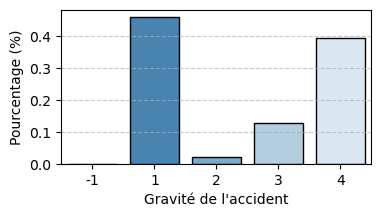

In [20]:
grav_distribution = dataset['grav'].value_counts(normalize=True)

plt.figure(figsize=(4, 2))
sns.barplot(x=grav_distribution.index, y=grav_distribution.values, palette="Blues_r", edgecolor='black')


plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observations:
* Une seule variable catégorielle à recoder, 'hrmn' -> heure et minute de l'accident
* Le dataset contient 198,448 observations et 34 features
* La variable hrmn (heure-minute de l’accident) présente 1367 valeurs uniques, ce qui montre une large dispersion des horaires d’accidents
* La distribution de la gravité des accidents montre que la majorité des incidents entraînent des blessures plutôt que des décès

In [ ]:
for i in dataset.columns :
  print("Description de", i,": \n",dataset[i].value_counts(normalize=True), "\n")

In [15]:
dataset[(dataset["catu"] == 3) & (dataset["catr"] == 1)].sample(n=15)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
30391,10,3,1,4,4,0,0,6,10,1987.0,...,1,1,1,0,1,46.298085,4.792142,19:30,5,4
111075,10,3,2,0,0,-1,-1,0,7,1977.0,...,1,3,1,3,1,43.325140,5.421480,20:36,18,1
45913,10,3,1,5,0,-1,-1,0,7,1998.0,...,1,1,1,0,1,48.396656,0.111344,20:00,12,3
27934,10,3,1,5,0,-1,-1,6,7,1992.0,...,1,1,1,0,2,43.380000,5.208190,18:24,28,3
27059,10,3,1,4,4,-1,-1,1,10,1988.0,...,1,2,1,0,1,46.185803,4.772165,09:15,18,3
104716,10,3,2,4,0,-1,-1,6,7,1972.0,...,2,1,1,0,1,49.328097,2.094985,08:05,18,4
12356,10,3,2,4,0,-1,-1,6,10,1972.0,...,2,1,1,0,1,49.328097,2.094985,08:05,18,4
2190,10,3,1,4,4,0,0,6,7,1987.0,...,1,1,1,0,1,46.298085,4.792142,19:30,5,4
3167,10,3,1,9,0,-1,-1,1,17,2001.0,...,1,1,1,0,1,50.959458,2.196193,08:00,30,3
89358,10,3,1,5,0,-1,-1,1,7,1943.0,...,3,3,1,0,1,43.404578,6.297881,14:29,21,3
